In [38]:
import pandas  as pd
import numbers as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [3]:
df_credit = pd.read_csv("Credit_Scoring.csv")

In [4]:
df_credit.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


In [5]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [6]:
df_credit.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.202620e+05,149992.000000,149992.000000,149992.000000,149992.000000,146068.000000
mean,75004.500000,0.066837,6.048729,52.295516,0.421029,352.985824,6.669872e+03,8.452877,0.265981,1.018221,0.240399,0.757236
std,43299.105125,0.249740,249.762028,14.771902,4.192890,2037.824499,1.438414e+04,5.146006,4.169414,1.129704,4.155290,1.115103
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37506.750000,0.000000,0.029863,41.000000,0.000000,0.175075,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75004.500000,0.000000,0.154162,52.000000,0.000000,0.366516,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112502.250000,0.000000,0.559012,63.000000,0.000000,0.868292,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
df_credit.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,False,False,False,False,False,False,False,False,False,False,False,False
149988,False,False,False,False,False,False,False,False,False,False,False,False
149989,False,False,False,False,False,False,True,False,False,False,False,False
149990,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df_credit_drop =df_credit.dropna()
df_credit_drop


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
5,14,1,0.964673,40,3,0.382965,13700.0,9,3,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149986,149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [16]:
100 * df_credit_drop.shape[0]/df_credit.shape[0]
#Sau khi loại bỏ dữ liệu khuyết thiếu  dữ liệu còn lại ~ 80%

80.17894287695344

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

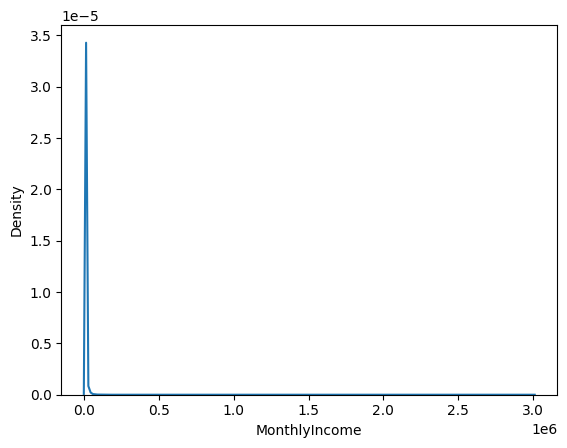

In [20]:
sns.kdeplot(data=df_credit_drop["MonthlyIncome"])

In [22]:
df_credit_1 = df_credit.interpolate(axis=1)
df_credit_1

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9.0,0.0,0.116951,27.0,0.0,46.000000,24.0,2.0,0.0,0.0,0.0,0.0
1,10.0,0.0,0.189169,57.0,0.0,0.606291,23684.0,9.0,0.0,4.0,0.0,2.0
2,11.0,0.0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0
3,12.0,0.0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0
4,13.0,0.0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996.0,0.0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
149988,149997.0,0.0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
149989,149998.0,0.0,0.246044,58.0,0.0,3870.000000,1944.0,18.0,0.0,1.0,0.0,0.0
149990,149999.0,0.0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


In [24]:
df_credit_1.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,False,False,False,False,False,False,False,False,False,False,False,False
149988,False,False,False,False,False,False,False,False,False,False,False,False
149989,False,False,False,False,False,False,False,False,False,False,False,False
149990,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

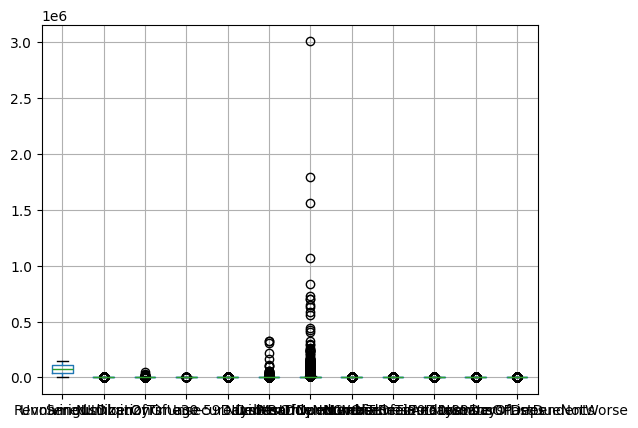

In [25]:
df_credit_1.boxplot()

<Axes: ylabel='MonthlyIncome'>

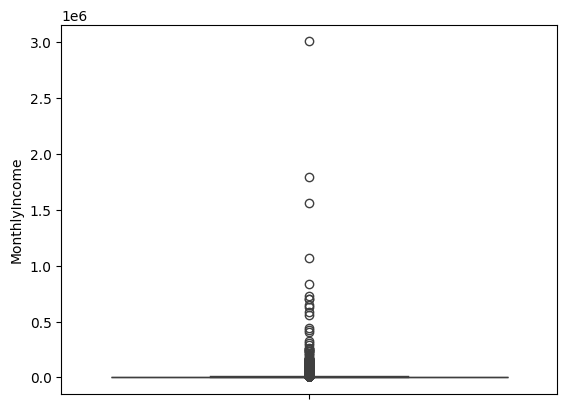

In [26]:
sns.boxplot(df_credit_1["MonthlyIncome"])

In [28]:
Q1 = df_credit_1.quantile(0.25)
Q3 = df_credit_1.quantile(0.75)

In [29]:
IQR = Q3-Q1

In [32]:
df_credit_2 = df_credit_1[~((df_credit_1 < (Q1 - 1.5 * IQR)) | (df_credit_1 > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: >

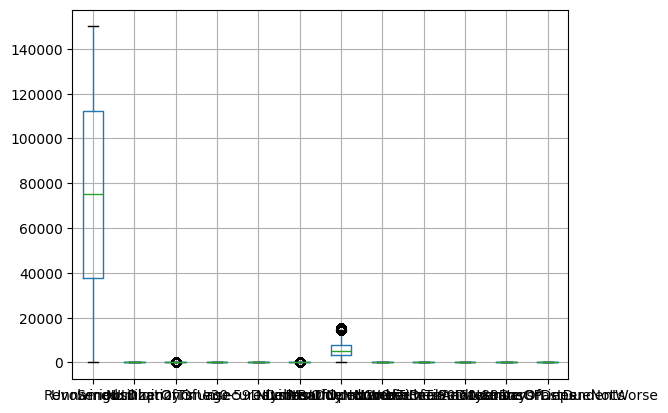

In [33]:
df_credit_2.boxplot()

<Axes: ylabel='MonthlyIncome'>

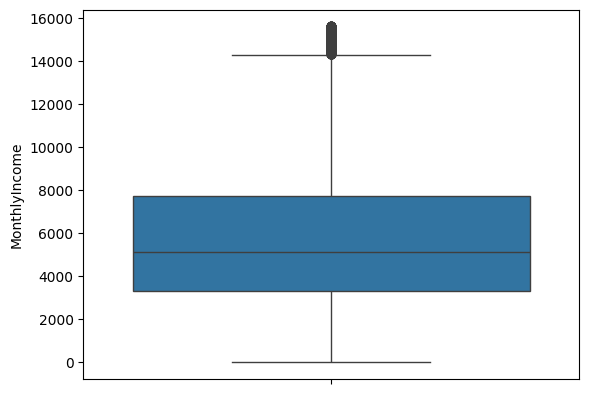

In [35]:
sns.boxplot(df_credit_2["MonthlyIncome"])

In [36]:
df_credit_2.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,76890.000000,76890.0,76890.000000,76890.000000,76890.0,76890.000000,76890.000000,76890.000000,76890.0,76890.000000,76890.0,76890.000000
mean,75092.319508,0.0,0.264318,52.929185,0.0,0.317611,5714.681226,8.049395,0.0,0.931552,0.0,0.518390
std,43259.698005,0.0,0.317195,15.385704,0.0,0.281695,3249.853682,4.299490,0.0,0.942512,0.0,0.743525
min,11.000000,0.0,0.000000,21.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,37747.250000,0.0,0.023148,41.000000,0.0,0.111378,3312.000000,5.000000,0.0,0.000000,0.0,0.000000
50%,75268.500000,0.0,0.111537,53.000000,0.0,0.268449,5125.000000,7.000000,0.0,1.000000,0.0,0.000000
75%,112463.750000,0.0,0.417336,64.000000,0.0,0.443096,7705.750000,11.000000,0.0,2.000000,0.0,1.000000
max,150000.000000,0.0,1.341700,96.000000,0.0,1.908046,15605.000000,20.000000,0.0,5.000000,0.0,2.000000


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

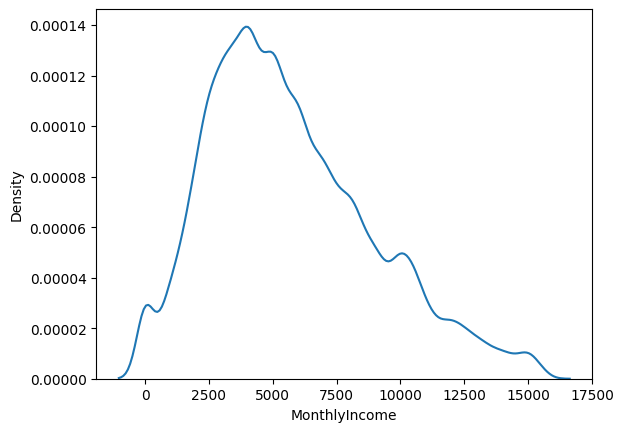

In [37]:
sns.kdeplot(data = df_credit_2['MonthlyIncome'])

In [39]:
#xử lý giá trị ngoại lại bằng phương pháp minmaxscaler
scaler = MinMaxScaler()
mms = scaler.fit_transform(pd.DataFrame(df_credit_2['MonthlyIncome']))

<Axes: ylabel='Density'>

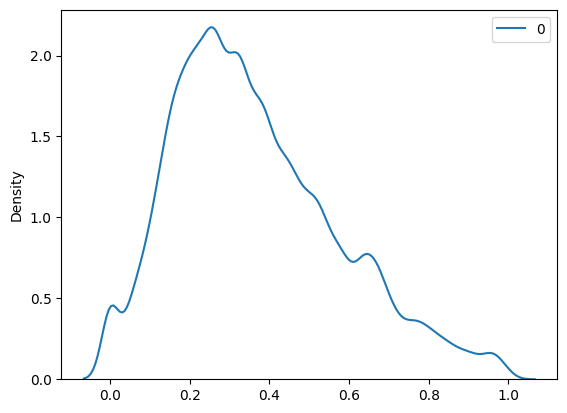

In [40]:
sns.kdeplot(data = mms)

In [44]:
#xử lý giá trị ngoại lai bằng phương pháp Robustscaler
scaler = RobustScaler()

rbs = scaler.fit_transform(pd.DataFrame(df_credit_2['MonthlyIncome']))

<Axes: ylabel='Density'>

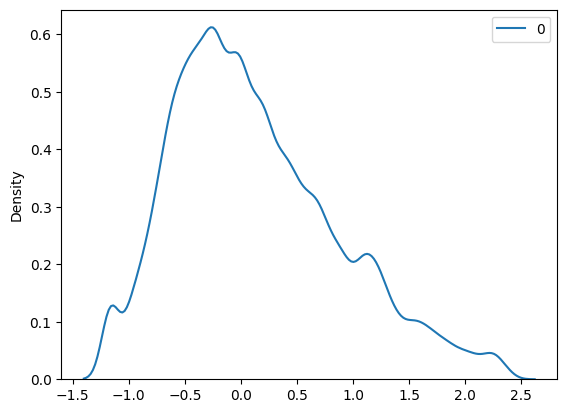

In [45]:
sns.kdeplot(data = rbs)

In [46]:
#Xử lý giá trị ngoại lai bằng phương pháp StandardScaler
scaler = StandardScaler()

sc = scaler.fit_transform(pd.DataFrame(df_credit_2['MonthlyIncome']))

<Axes: ylabel='Density'>

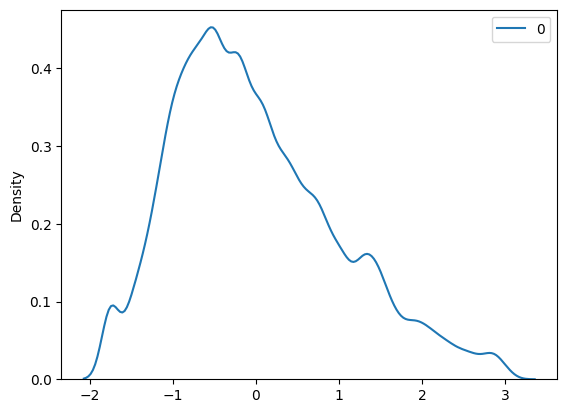

In [47]:
sns.kdeplot(data = sc)